In [4]:
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
%matplotlib inline
import random

import tensorflow as tf
# tf.enable_eager_execution()

import warnings
warnings.filterwarnings('ignore')

### 1. Feedforward: Building a ReLU neural network
1. Draw a network with:
    - 2 inputs
    - 1 hidden layers with 4 hidden units and a 
    - 1-class output (for binary classification)


![alt text](IMG_0087.jpg "Title")

The bias is ignore in the network graph, but it will be shown below. 

2. Write out the mathematical equation for the output of this network (feel free to break the input-output relationship into multiple equations).


$a_1 = w_{11}x_1 + w_{21}x_2 + b_1$, $h_1 = ReLu(a_1)$

$a_2 = w_{12}x_1 + w_{22}x_2 + b_2$, $h_2 = ReLu(a_2)$

$a_3 = w_{13}x_1 + w_{23}x_2 + b_3$, $h_3 = ReLu(a_3)$

$a_4 = w_{14}x_1 + w_{24}x_2 + b_4$, $h_4 = ReLu(a_4)$


$y = Sigmoid(v_1h_1+v_2h_2+v_3h_3+v_4h_4+c)$



3. Write out the forward-pass function in python, call it `ff_nn_ReLu(...)`

In [5]:
tf.nn.sigmoid
tf.nn.tanh
tf.nn.relu
linear = lambda x: x

def ff_nn_Relu(x, w, b, v, c):
    '''
    transformation for simple 2 layer neural net (hidden + output layers)
    '''
    hidden = tf.nn.relu(x @ w + b) 
    return tf.nn.sigmoid(hidden @ v +c)

4. What are the class probabilities associated with the forward pass of each sample?

In [6]:
w = tf.constant([[1.,-1.,0.,1.], [0.,0.,0.5,1.]], dtype=tf.float64)
b = tf.constant([0,0,1,0], dtype=tf.float64)
v = tf.constant([[1],[0],[-1],[1]], dtype=tf.float64)
c = tf.constant([1], dtype=tf.float64)
x = tf.constant([[1, -1],[0,-1],[0,1]], dtype=tf.float64)
yhat = ff_nn_Relu(x, w,b,v,c)
yhat

<tf.Tensor: shape=(3, 1), dtype=float64, numpy=
array([[0.81757448],
       [0.62245933],
       [0.62245933]])>

### 2. Gradient Descent
Consider a simple non-convex function of two variables: $f(x,y)=(3 - x^3)+50(2y^2 - x)^2$
1. What are the partial derivatives of f with respect to x and to y?

$\frac{df}{dx} = -3x^2 - 100 (2y^2 - x) = -3x^2 + 100x - 200y^2$

$\frac{df}{dy} = 100 (2y^2 - x) 4y = 800y^3 -400xy$


2. Create a visualization of the contours of this function.

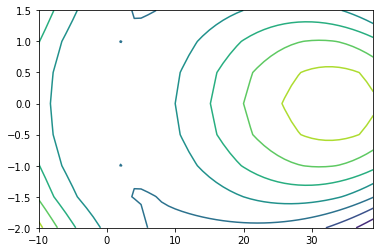

In [7]:
x = np.arange(-10, 40, 1)
y = np.arange(-2, 2, 0.5)
X, Y = np.meshgrid(x, y)
Z = (3 - X**3) + 50 * (2 * Y**2 - X)**2
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)

3. Write a Gradient Descent algorithm for finding the minimum of the function. Visualize your results with a few different learning rates.


In [8]:
def grad_f(vector):
    x, y = vector
    df_dx = -3*x**2 - 100*(2*y**2 -x)
    df_dy = 400*(2*y**2 -x)*y
    return np.array([df_dx, df_dy])


def grad_descent(starting_point=None, iterations=10, learning_rate=12):
    if starting_point is None:
        point = np.random.uniform(-10,10, size = 2)
    else:
        point = starting_point
        
    traj = [point]
    for i in range(iterations):
        grad = grad_f(point)
        point = point - learning_rate * grad
        traj.append(point)
        
    return np.array(traj)


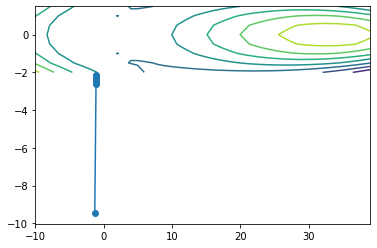

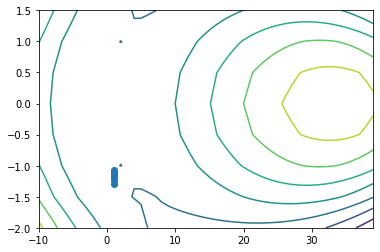

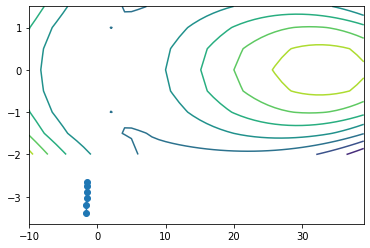

In [17]:
# try different learning rate
np.random.seed(2)
for i in [0.00001,0.00005,0.000006]:
    traj = grad_descent(iterations=5, learning_rate=i)
    fig, ax = plt.subplots()
    CS = ax.contour(X, Y, Z)
    x= traj[:,0]
    y= traj[:,1]
    plt.plot(x,y,'-o')

4. Write a Gradient Descent With Momentum algorithm for finding the minimum. Visualize your results with a few different settings of the algorithm’s hyperparameters.


In [13]:
def grad_descent_with_momentum(starting_point=None, iterations=10, alpha=.9, epsilon=10):
    if starting_point is None:
        point = np.random.uniform(-5,5,size=2)
    else:
        point = starting_point
    trajectory = [point]
    v = np.zeros(point.size)
    for i in range(iterations): 
        v = v*alpha + grad_f(point)*epsilon
        point = point - v
        trajectory.append(point)
    return np.array(trajectory)

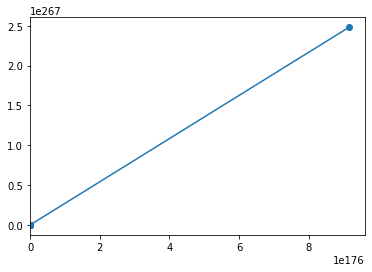

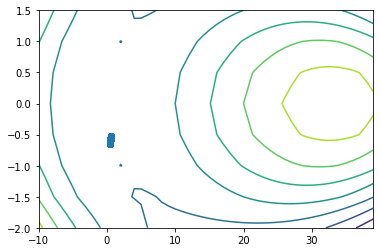

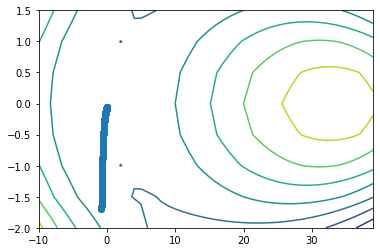

In [18]:
np.random.seed(2)
#change epsilon
for i in [0.00001,0.0000005,0.0000006]:
    traj = grad_descent_with_momentum(iterations=10000,alpha=0.9,epsilon=i)
    fig, ax = plt.subplots()
    CS = ax.contour(X, Y, Z)
    x= traj[:,0]
    y= traj[:,1]
    plt.plot(x,y,'-o')

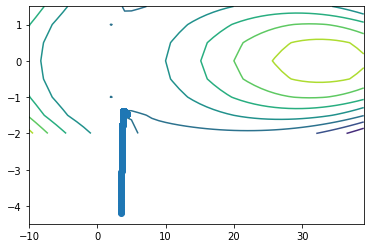

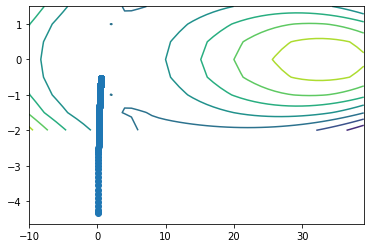

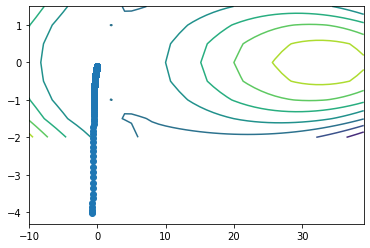

In [21]:
#change alpha
for i in [0.5,0.8,0.9]:
    traj = grad_descent_with_momentum(iterations=10000,alpha=i,epsilon=0.0000006)
    fig, ax = plt.subplots()
    CS = ax.contour(X, Y, Z)
    x= traj[:,0]
    y= traj[:,1]
    plt.plot(x,y,'-o')

### 3. Backprop

1. For the same network as in Question 1, derive expressions of the gradient of the Loss function with respect to each of the model parameters.


Since this is a binary classification problem, the loss function is $$ L = - y log(\hat{y}) - (1-y) log(1 - \hat{y})$$
The gradient respected to $v$ is $$\frac{dL}{dv_4} = \frac{dL}{d\hat{y}}  \frac{d\hat{y}}{dv_4} = (\frac{1-y}{1-\hat{y}} - \frac{y}{\hat{y}}) \times ReLu( w_{14}x_1 + w_{24}x_2 + b_4)$$
The gradient respected to $c$ is $$\frac{dL}{dc} = \frac{dL}{d\hat{y}}  \frac{d\hat{y}}{dc} = (\frac{1-y}{1-\hat{y}} - \frac{y}{\hat{y}}) \times  \frac{dSigmoid(v_1h_1+v_2h_2+v_3h_3+v_4h_4+c)}{dc}  $$

The gradient respected to $w$ is $$\frac{dL}{dw_{1i}} = \frac{dL}{d\hat{y}}  \frac{d\hat{y}}{dh_i}  \frac{dh_i}{da_i} \frac{da_i}{dw_{1i}}  $$
$$\frac{dL}{dw_{2i}} = \frac{dL}{d\hat{y}}  \frac{d\hat{y}}{dh_i}  \frac{dh_i}{da_i} \frac{da_i}{dw_{2i}}  $$
where $$a_i = w_{1i}x_1 + w_{2i}x_2 + b_1 \text{ and }h_i= ReLu(a_i)$$

The gradient respected to $b$ is $$\frac{dL}{db_i} = \frac{dL}{d\hat{y}}  \frac{d\hat{y}}{dh_i}  \frac{dh_i}{da_i} \frac{da_i}{db_i}  $$
where $$a_i = w_{1i}x_1 + w_{2i}x_2 + b_1 \text{ and }h_i= ReLu(a_i)$$


2. Write a function grad f(...) that takes in a weights vector and returns the gradient of the Loss at that location.

In [63]:
def loss(y, y_hat):
    # binary cross entropy
    return  np.sum(- (y*np.log(y_hat) + (1-y)*np.log(1 - y_hat)))

def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

def relu(x):
    return np.maximum(x,0)

def relu_derivative(x):
    return np.where(x>0, 1, 0)

def yhat(x, W, b, v, c):
    # returns model prediction 
    h = relu(np.dot(x,W) + b)
    y = sigmoid(np.dot(h,v) + c)
    return y

def binary_xent_residual(y, y_hat):
    return (y/y_hat - (1-y)/(1-y_hat))

def pack_params(param_vec):
    w_11, w_12, w_13, w_14, w_21, w_22, w_23, w_24, b_1, b_2,b_3, b_4, v_1, v_2, v_3, v_4, c = param_vec
    W = np.array([[w_11, w_12, w_13, w_14],[w_21, w_22, w_23, w_24]])
    b = np.array([b_1, b_2, b_3, b_4])
    v = np.array([v_1,v_2, v_3, v_4])
    c = np.array([c])
    return((W, b, v, c))

In [64]:
def grad_f(param_vec, x, y):
    
    W, b, v, c = pack_params(param_vec)
    
    a = np.dot(x,W)+b
    h = relu(a)
    y_a = np.dot(h,v)+c
    y_hat = sigmoid(y_a)
    
    dL_dc = np.average(binary_xent_residual(y, y_hat) * sigmoid_derivative(y_a))
    
    dL_dv1 =  np.average(binary_xent_residual(y, y_hat) * sigmoid_derivative(y_a) * h[:,0])
    dL_dv2 =  np.average(binary_xent_residual(y, y_hat) * sigmoid_derivative(y_a) * h[:,1])
    dL_dv3 =  np.average(binary_xent_residual(y, y_hat) * sigmoid_derivative(y_a) * h[:,2])
    dL_dv4 =  np.average(binary_xent_residual(y, y_hat) * sigmoid_derivative(y_a) * h[:,3])
    
    dL_db1 =  np.average(binary_xent_residual(y, y_hat) * sigmoid_derivative(y_a) * v[0] * relu_derivative(a[:,0]))
    dL_db2 =  np.average(binary_xent_residual(y, y_hat) * sigmoid_derivative(y_a) * v[1] * relu_derivative(a[:,1]))
    dL_db3 =  np.average(binary_xent_residual(y, y_hat) * sigmoid_derivative(y_a) * v[2] * relu_derivative(a[:,2]))
    dL_db4 =  np.average(binary_xent_residual(y, y_hat) * sigmoid_derivative(y_a) * v[3] * relu_derivative(a[:,3]))

    dL_dw11 =  np.average(binary_xent_residual(y, y_hat) * sigmoid_derivative(y_a) * v[0] * relu_derivative(a[:,0]) * x[:,0])
    dL_dw12 =  np.average(binary_xent_residual(y, y_hat) * sigmoid_derivative(y_a) * v[1] * relu_derivative(a[:,1]) * x[:,0])
    dL_dw13 =  np.average(binary_xent_residual(y, y_hat) * sigmoid_derivative(y_a) * v[2] * relu_derivative(a[:,2]) * x[:,0])
    dL_dw14 =  np.average(binary_xent_residual(y, y_hat) * sigmoid_derivative(y_a) * v[3] * relu_derivative(a[:,3]) * x[:,0])
    
    dL_dw21 =  np.average(binary_xent_residual(y, y_hat) * sigmoid_derivative(y_a) * v[0] * relu_derivative(a[:,0]) * x[:,1])
    dL_dw22 =  np.average(binary_xent_residual(y, y_hat) * sigmoid_derivative(y_a) * v[1] * relu_derivative(a[:,1]) * x[:,1])
    dL_dw23 =  np.average(binary_xent_residual(y, y_hat) * sigmoid_derivative(y_a) * v[2] * relu_derivative(a[:,2]) * x[:,1])
    dL_dw24 =  np.average(binary_xent_residual(y, y_hat) * sigmoid_derivative(y_a) * v[3] * relu_derivative(a[:,3]) * x[:,1])
    
    return np.array([dL_dw11, dL_dw12, dL_dw13, dL_dw14, 
                     dL_dw21, dL_dw22, dL_dw23, dL_dw24, 
                     dL_db1, dL_db2, dL_db3, dL_db4,
                     dL_dv1, dL_dv2, dL_dv3, dL_dv4,
                     dL_dc])

3. Generate a synthetic dataset like the XOR pattern (see below).


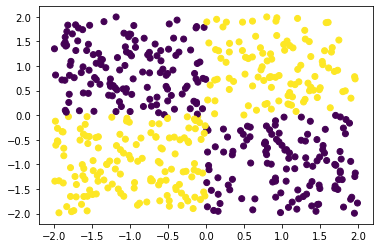

In [65]:
x = np.random.uniform(low=-2,high=2,size=1000).reshape((500,2))
y=np.zeros(500)
y[np.logical_and(x[:,0]>0 , x[:,1]>0)]=1
y[np.logical_and(x[:,0]<0 , x[:,1]<0)]=1
plt.scatter(x[:,0],x[:,1],c=y)

4. Fit your network using Gradient Descent. Keep track of the total Loss at each iteration and plot the result.

In [66]:
def grad_descent(x, y,  iterations=10, learning_rate=1e-2):
    point = np.random.uniform(-.1,.1,size=17).astype("float128")
    trajectory = [point]
    losses = [loss(y, yhat(x, *pack_params(point)))]
    
    for i in range(iterations):
        grad = grad_f(point, x, y)
        point = point + learning_rate * grad
        trajectory.append(point)
        losses.append(loss(y, yhat(x, *pack_params(point))))
    return (np.array(trajectory), losses)


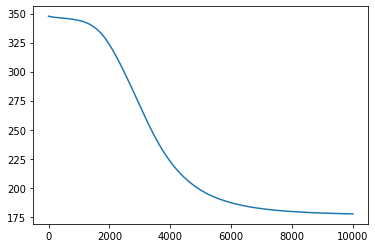

In [80]:
traj, losses = grad_descent(x, y, iterations =10000,learning_rate=0.01)
plt.plot(losses)

5. Repeat the exercise above using Momentum. Comment on whether your algorithm seems to converge more efficiently.

In [78]:
def grad_descent_with_momentum(x, y, starting_point=None, iterations=10, alpha=.9, epsilon=10):
    if starting_point is None:
        starting_point = np.random.uniform(-1, 1, size=17)
 
    point = starting_point
    trajectory = [point]
    v = np.zeros(point.size)
    losses = [loss(y, yhat(x, *pack_params(point)))]

    for i in range(iterations):
        grad = grad_f(point, x, y)
        v = alpha * v + epsilon * grad
        point = point + v
        trajectory.append(point)
        losses.append(loss(y, yhat(x, *pack_params(point))))
  
    return (np.array(trajectory), losses)

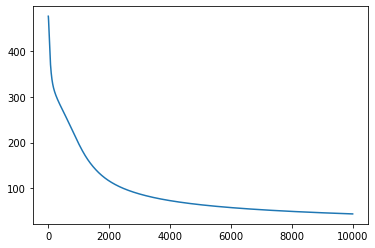

In [82]:
traj, losses = grad_descent_with_momentum(x, y, iterations = 10000, alpha =0.9, epsilon=.001)
plt.plot(losses)

The Momentum algorithm converges is more efficient comparing to previous one.

6. Plot a visualization of the final decision boundary that your model has learned. Overlay the datapoints in this plot.


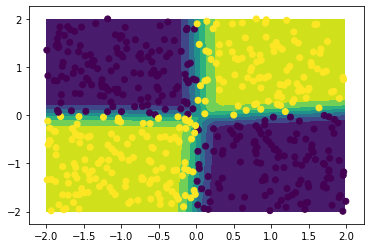

In [83]:
delta = 0.025
x1 = np.arange(-2.0, 2.0, delta)
x2 = np.arange(-2.0, 2.0, delta)
X1, X2 = np.meshgrid(x1, x2)
YHAT = yhat(np.array((X1.ravel(),X2.ravel())).T, *pack_params(traj[-1])).reshape((160,160))
fig, ax = plt.subplots()
CS = ax.contourf(X1, X2, YHAT)

plt.scatter(x[:,0],x[:,1],c=y)